# K-Means Clustering on the Wine Dataset

**Goal:**
1. Load and standardize the Wine dataset.
2. Run K-Means with K = 3.
3. Analyze inertia and silhouette scores for K = 2 to 10.
4. Visualize the clusters in 2D via PCA.
5. Compare cluster assignments to true class labels.

In [1]:
# 0. Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

sns.set(style='whitegrid', context='notebook')

## 1. Data Loading & Preprocessing

- Load Wine dataset (13 chemical features, 3 cultivars).
- Standardize features to mean=0 and variance=1.

In [2]:
# load data
wine = load_wine()
X = wine.data       # shape (178,13)
y = wine.target     # labels 0,1,2
feature_names = wine.feature_names
target_names = wine.target_names

# standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"X_scaled shape = {X_scaled.shape}")

X_scaled shape = (178, 13)


## 2. Baseline K-Means (K = 3)

- Initialize K-Means with `n_clusters=3`.
- Fit on the standardized data.
- Inspect cluster centers and inertia.

In [3]:
# fit KMeans with 3 clusters
km3 = KMeans(n_clusters=3, random_state=42, n_init=10)
km3.fit(X_scaled)

# labels, inertia, cluster centers
labels3 = km3.labels_
inertia3 = km3.inertia_
centers3 = km3.cluster_centers_

print(f"Inertia (K=3): {inertia3:.2f}")
print("Cluster centers (scaled feature space):")
print(np.round(centers3, 2))

Inertia (K=3): 1277.93
Cluster centers (scaled feature space):
[[-0.93 -0.39 -0.49  0.17 -0.49 -0.08  0.02 -0.03  0.06 -0.9   0.46  0.27
  -0.75]
 [ 0.16  0.87  0.19  0.52 -0.08 -0.98 -1.22  0.73 -0.78  0.94 -1.16 -1.29
  -0.41]
 [ 0.84 -0.3   0.36 -0.61  0.58  0.89  0.98 -0.56  0.58  0.17  0.47  0.78
   1.13]]


## 3. Selecting K: Elbow Method & Silhouette Score

- Compute inertia and average silhouette score for K = 2 to 10.
- Plot to identify a good trade-off.

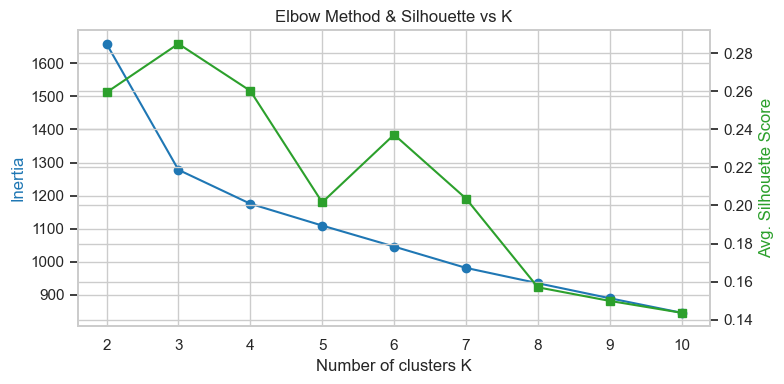

In [4]:
ks = list(range(2, 11))
inertias = []
silhouettes = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labs = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labs))

fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()

ax1.plot(ks, inertias, '-o', color='tab:blue', label='Inertia')
ax2.plot(ks, silhouettes, '-s', color='tab:green', label='Silhouette')

ax1.set_xlabel('Number of clusters K')
ax1.set_ylabel('Inertia', color='tab:blue')
ax2.set_ylabel('Avg. Silhouette Score', color='tab:green')
ax1.set_xticks(ks)
plt.title('Elbow Method & Silhouette vs K')
fig.tight_layout()
plt.show()

## 4. Visualization of Clusters in 2D (PCA)

- Reduce data to 2 principal components.
- Plot the points colored by K-Means clusters and by true labels.

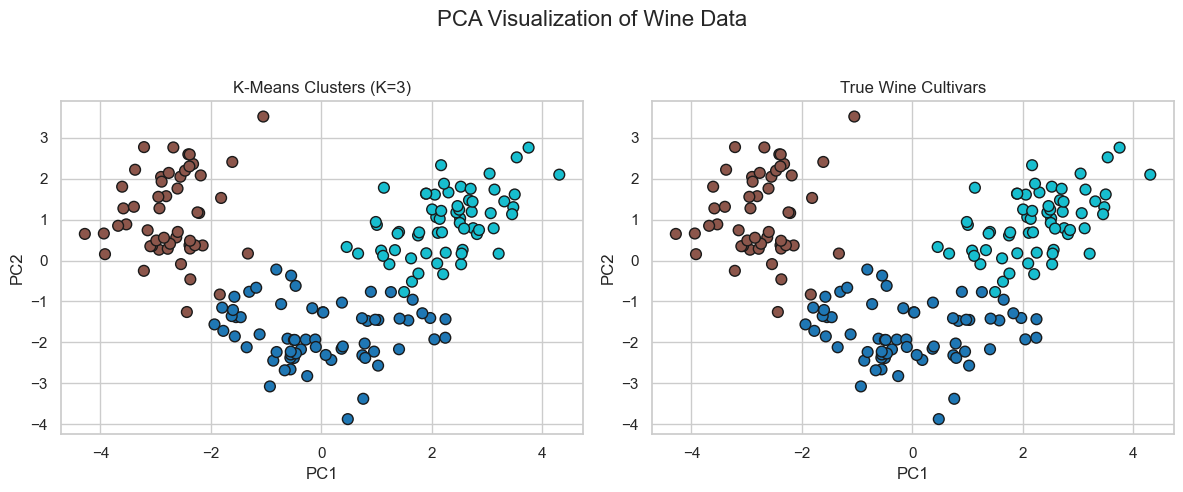

In [6]:
# PCA to 2 dims
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# plot by KMeans labels (K=3)
axes[0].scatter(
    X_pca[:,0], X_pca[:,1],
    c=labels3, cmap='tab10', edgecolor='k', s=60)
axes[0].set_title('K-Means Clusters (K=3)')
axes[0].set_xlabel('PC1'); axes[0].set_ylabel('PC2')

# plot by true labels
axes[1].scatter(
    X_pca[:,0], X_pca[:,1],
    c=labels3, cmap='tab10', edgecolor='k', s=60)
axes[1].set_title('True Wine Cultivars')
axes[1].set_xlabel('PC1'); axes[1].set_ylabel('PC2')

fig.suptitle('PCA Visualization of Wine Data', fontsize=16)
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

## 5. Insights & Next Steps

- The elbow plot suggests a knee around K = 3 or 4.
- Silhouette score peaks around K = 3, indicating well-separated clusters.
- PCA plot shows that K-Means recovers most of the cultivar structure, with some overlap.